In [1]:
import pandas as pd

In [2]:
passageiros=pd.read_csv("raw-data/passageiros.csv")

In [4]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
import seaborn as sns

In [7]:
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = (10,6)
mpl.rcParams["font.size"] = 20

<Axes: xlabel='tempo', ylabel='passageiros'>

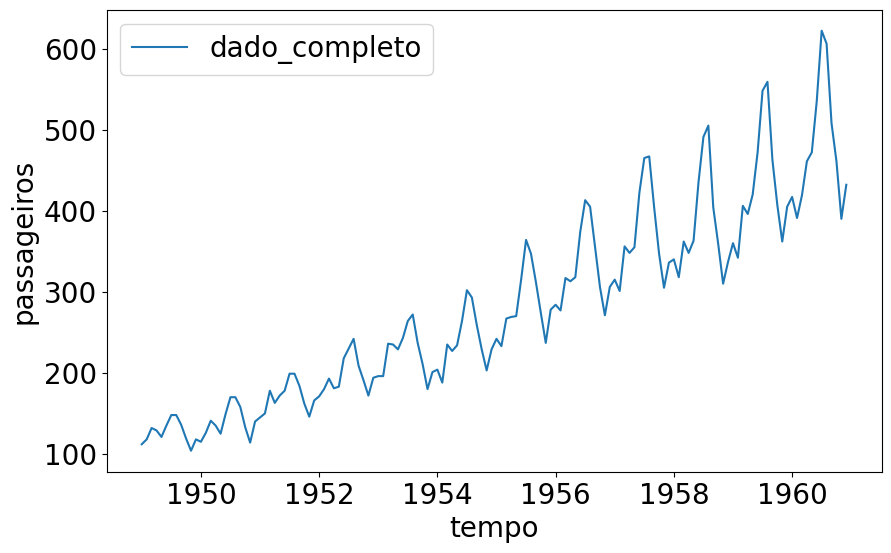

In [8]:
sns.lineplot(x="tempo", y="passageiros", data=passageiros, label="dado_completo")